In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parents[1].resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [2]:
from src.model_analyser import ModelAnalyser
from src.model.tcr_representation_model import load_blastr_save

/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
analyser = ModelAnalyser()
model = load_blastr_save(Path("/home/yutanagano/UCLOneDrive/MBPhD/projects/tcr_embedder/model_saves/Beta_CDR3_BERT"))

Running KnnAnalysis...


/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/torch/nn/modules/transformer.py:296: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:177.)
  output = torch._nested_tensor_from_mask(output, src_key_padding_mask.logical_not(), mask_check=False)


Running PrecisionRecallAnalysis...
Running PgenAnalysis...


100%|██████████| 840/840 [08:24<00:00,  1.67it/s]
/home/yutanagano/Projects/tcr_embedder/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Running MetricCalibrationAnalysis...


100%|██████████| 201/201 [02:24<00:00,  1.39it/s]
/home/yutanagano/Projects/tcr_embedder/src/model_analyser/analysis/metric_calibration_analysis.py:216: RuntimeWarning: invalid value encountered in divide
  relative_countour = ep_matched_dist_pdf.densities / bg_dist_pdf.densities


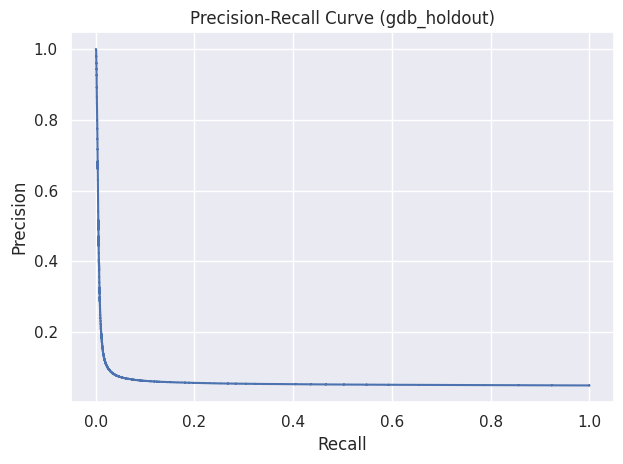

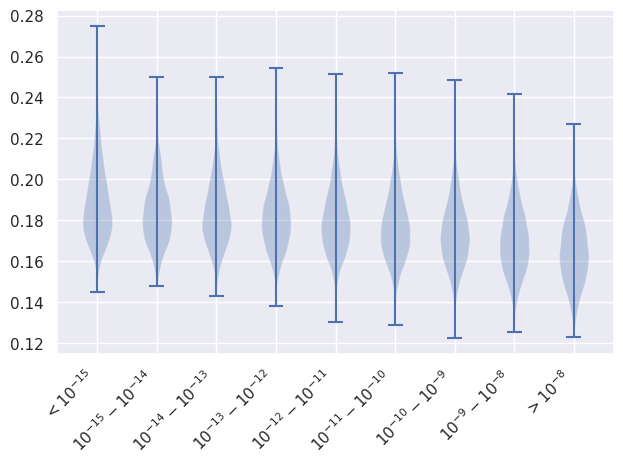

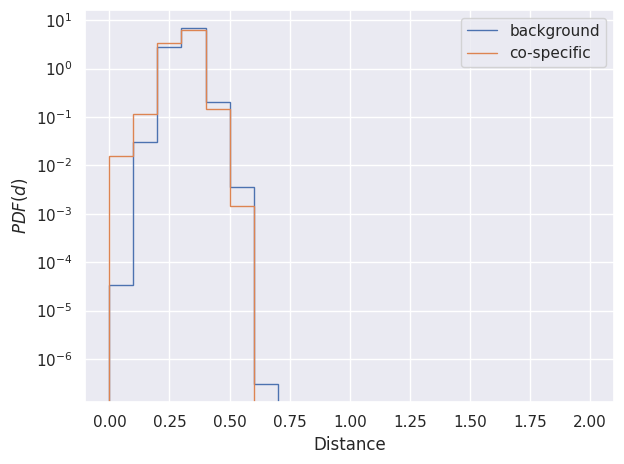

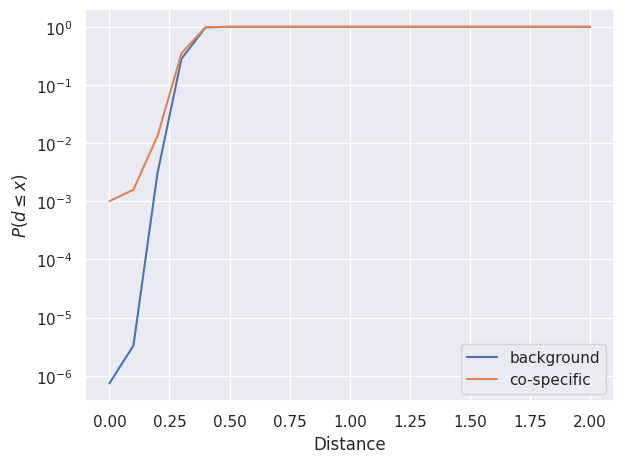

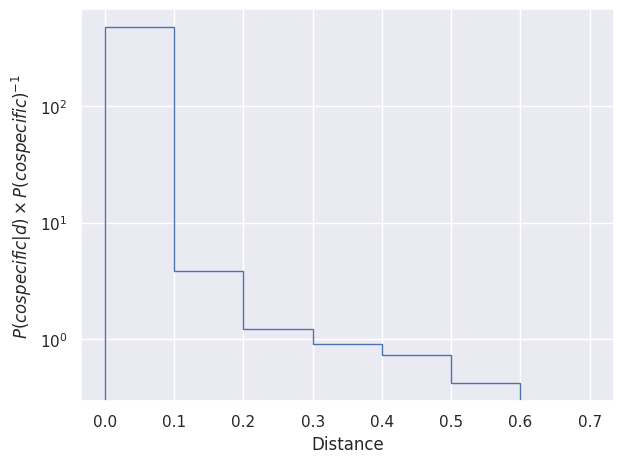

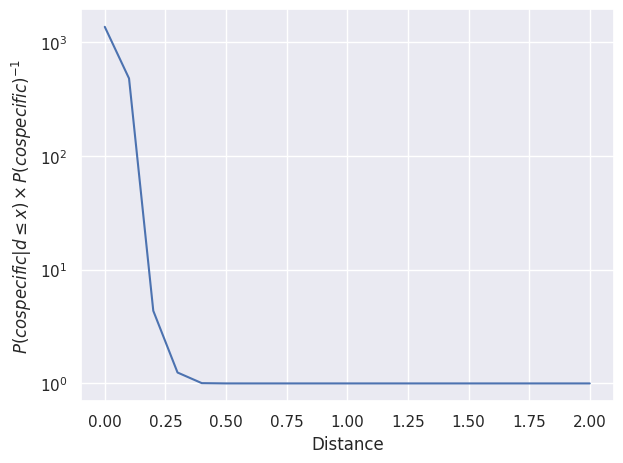

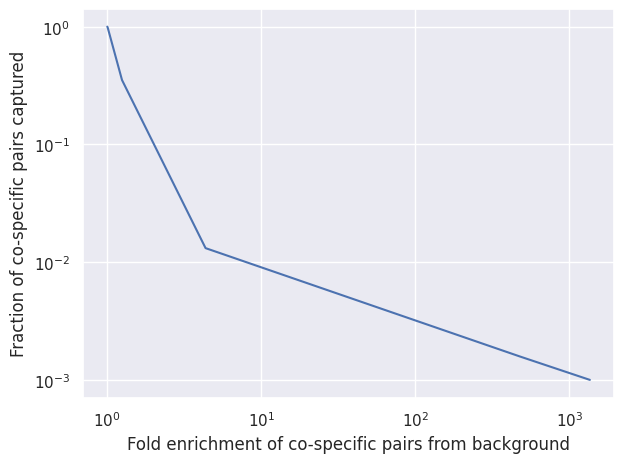

In [4]:
analyser.analyse(model)